In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from preproseccing import get_data, create_ts_train_test_data, get_data_diff, get_data_division
from calculate_metrics import get_metrics, construct_ts, get_metrics_from_df
from models import get_model_fc

/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages

In [3]:
data = get_data(return_only_labels=False)
C_policies = ['C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H2_Testing policy', 'H3_Contact tracing']
data = data[['Date', 'Country'] + C_policies + ['Confirmed']]

In [4]:
data['C2_Workplace closing'].value_counts()

2.0    8536
3.0    4438
0.0    2596
1.0    1878
Name: C2_Workplace closing, dtype: int64

In [5]:
country_C2_2 = np.unique(data.loc[data['C2_Workplace closing'] == 2.0,'Country'])

In [6]:
country_C2_3 = np.unique(data.loc[data['C2_Workplace closing'] == 3.0,'Country'])

In [7]:
np.intersect1d(country_C2_2, country_C2_3)

array(['Algeria', 'Andorra', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Cabo Verde', 'Canada', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'France', 'Gabon', 'Georgia', 'Guyana',
       'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jordan', 'Kazakhstan',
       'Korea, South', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Liberia',
       'Libya', 'Lithuania', 'Madagascar', 'Malaysia', 'Mauritius',
       'Mexico', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Portugal', 'Russia', 'Rwanda', 'Serbia',
       'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa',


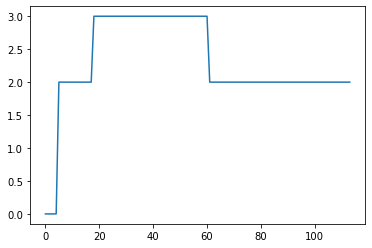

In [8]:
data_c2 = data.loc[data['Country'] == 'Russia'].reset_index(drop=True)
plt.plot(data_c2['C2_Workplace closing'])

In [9]:
data = data.loc[data['Country'] == 'Russia'].reset_index(drop=True)

In [10]:
data.shape

(129, 13)

In [11]:
data = data.dropna()

In [12]:
from fbprophet import Prophet

In [13]:
data = data.sort_values(by=['Date'])

In [14]:
data['Confirmed_diff'] = data['Confirmed'].diff()


In [15]:
data = data.iloc[1:].reset_index(drop=True)

In [16]:
df_prophet = pd.DataFrame({'ds': data['Date'], 'y': np.log(data['Confirmed_diff'])})

In [34]:
test_period = 50
m = Prophet(seasonality_mode='multiplicative',
            daily_seasonality=False, weekly_seasonality = 10, yearly_seasonality=False)
m.fit(df_prophet.iloc[:-test_period])

In [35]:
future = m.make_future_dataframe(periods=test_period)
forecast = m.predict(future)

In [36]:
y_pred = np.exp(forecast['yhat'])

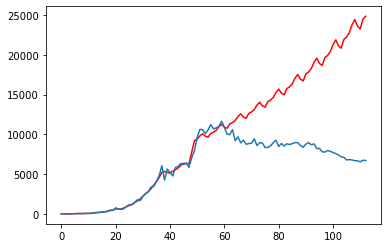

In [37]:
plt.plot(y_pred, c='r')
plt.plot(np.exp(df_prophet['y'].values))

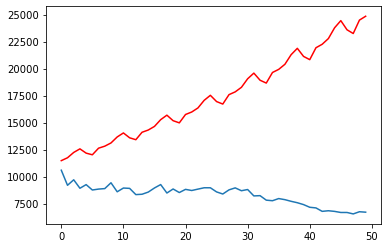

In [38]:

y_pred_test = np.exp(forecast['yhat'][-test_period:].values)
y_true_test = np.exp(df_prophet.iloc[-test_period:]['y'].values)
plt.plot(y_pred_test, c='r')
plt.plot(y_true_test)

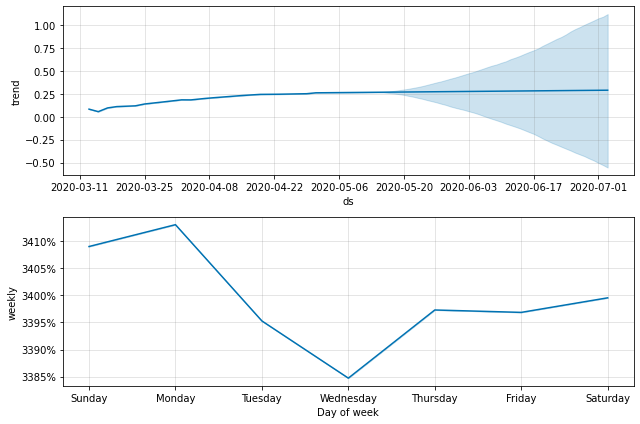

In [39]:
fig2 = m.plot_components(forecast)

In [40]:
y_pred_test

array([11482.62076085, 11749.19382788, 12242.8494571 , 12573.31832097,
       12177.87838149, 12024.33352248, 12636.36423057, 12821.67378396,
       13120.44495569, 13675.79741339, 14046.73012422, 13597.33305377,
       13421.42436414, 14110.15941574, 14316.88131536, 14651.73511964,
       15276.46284856, 15692.80456804, 15182.2394988 , 14980.84127702,
       15755.84520236, 15986.45341097, 16361.74251263, 17064.47603086,
       17531.77522689, 16951.88279111, 16721.444705  , 17593.46940927,
       17850.72370385, 18271.32526377, 19061.76482699, 19586.24675874,
       18927.79587531, 18664.28646108, 19645.41805785, 19932.3970464 ,
       20403.77585925, 21292.82362158, 21881.47276185, 21134.02157813,
       20832.8643396 , 21936.6880795 , 22256.82603162, 22785.1052567 ,
       23785.01371173, 24445.66619248, 23597.40516051, 23253.40631143,
       24495.19182949, 24852.31976108])

In [41]:
df_prophet.shape

(113, 2)

In [42]:
data.iloc[-test_period:].reset_index(drop=True)[C_policies].diff()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H2_Testing policy,H3_Contact tracing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# data.reset_index(drop=True)[C_policies].diff().replace(to_replace=0, method='ffill').values

In [27]:
df_prophet['ds'].values[-15:]

array(['06/19/2020', '06/20/2020', '06/21/2020', '06/22/2020',
       '06/23/2020', '06/24/2020', '06/25/2020', '06/26/2020',
       '06/27/2020', '06/28/2020', '06/29/2020', '06/30/2020',
       '07/01/2020', '07/02/2020', '07/03/2020'], dtype=object)

In [28]:
data.iloc[-test_period:].resetb_index(drop=True)[C_policies]

AttributeError: 'DataFrame' object has no attribute 'resetb_index'

In [ ]:
data['C2_Workplace closing'].plot()

In [ ]:
std_data = data.std()
drop_col = std_data[std_data < 1e-5].index
data = data.drop(drop_col, axis=1)
for c in drop_col:
    C_policies.remove(c)

In [ ]:
data[C_policies[2]].value_counts()

In [ ]:
data.std()

In [ ]:
data['C2_Workplace closing'].value_counts()

In [ ]:
dummy = pd.get_dummies(data=data[['C2_Workplace closing']], columns=['C2_Workplace closing'])

In [ ]:
dummy

In [ ]:
# data = data.drop(['C8_International travel controls', 'H3_Contact tracing'],axis=1)
# C_policies.remove('C8_International travel controls')
# C_policies.remove('H3_Contact tracing')

In [ ]:
y_pred = forecast['yhat'].values

In [ ]:
y_true = df_prophet['y'].values

In [ ]:
X = dummy.values

In [ ]:
X

In [ ]:
X_ker = np.zeros(shape = X.shape)
for i in range(X.shape[1]):
#     X_ker[:,i] = X[:,i]*y_pred
    X_ker[:,i] = X[:,i]

In [ ]:
from sklearn.linear_model import LinearRegression
res =  y_true - y_pred
reg = LinearRegression(fit_intercept=False).fit(X_ker, res)

In [ ]:
reg.score(X_ker, res)

In [ ]:
reg.coef_

In [ ]:
y_pred2 = reg.predict(X_ker) + y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
MAE(y_true, y_pred)

In [ ]:
MAE(y_true, y_pred2)

In [ ]:
# X_ker_tune = X_ker[:,[1,3,4,5,6,8]]
X_ker_tune = X_ker[:,[1,3,4,5,6,8]]

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X_ker_tune, res)

In [ ]:
reg.score(X_ker_tune, res)

In [ ]:
reg.coef_